## K‑Means helps you discover natural patient groups based on similarity, enabling hospitals to understand patient profiles, risks, and resource needs

## Goal:To discover meaningful patient groups that share similar clinical profiles.


## NEEDS :
- numeric features (scaled)
- a chosen value of k
- evaluation metrics like:
- Silhouette Score
- Calinski‑Harabasz Score


## We don’t use feature selection in clustering because there is no target variable, and removing features too early destroys the clinical meaning needed for patient segmentation.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"D:\HealthCare System\diabetic_data_cleaned.csv")
print(df.shape)
df.head()


(101766, 50)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_desc,admission_source_desc,readmitted_binary
0,3,0,0,6,25,1,1,38,41,0,...,0,0,0,1,0,2,7,23,5,0
1,3,0,1,1,1,7,3,0,59,0,...,0,0,0,0,1,1,1,1,1,0
2,1,0,2,1,1,7,2,0,11,5,...,0,0,0,1,1,2,1,1,1,0
3,3,1,3,1,1,7,2,0,44,1,...,0,0,0,0,1,2,1,1,1,0
4,3,1,4,1,1,7,1,0,51,0,...,0,0,0,0,1,2,1,1,1,0


In [2]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_desc', 'admission_source_desc',
       'readmitted_binary'],
      dtype='object')

In [3]:
features=["age",
    "time_in_hospital",
    "num_lab_procedures",
    "num_procedures",
    "num_medications",
    "number_outpatient",
    "number_emergency",
    "number_inpatient",
    "number_diagnoses"
]

X=df[features].copy()
X.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0,1,41,0,1,0,0,0,1
1,1,3,59,0,18,0,0,0,9
2,2,2,11,5,13,2,0,1,6
3,3,2,44,1,16,0,0,0,7
4,4,1,51,0,8,0,0,0,5


##  Scaling 

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[:5]


array([[-3.82459963e+00, -1.13764856e+00, -1.06516859e-01,
        -7.85397739e-01, -1.84826769e+00, -2.91461485e-01,
        -2.12620184e-01, -5.03276193e-01, -3.32159590e+00],
       [-3.19727694e+00, -4.67652708e-01,  8.08383873e-01,
        -7.85397739e-01,  2.43389649e-01, -2.91461485e-01,
        -2.12620184e-01, -5.03276193e-01,  8.15784478e-01],
       [-2.56995426e+00, -8.02650635e-01, -1.63135141e+00,
         2.14578066e+00, -3.71803686e-01,  1.28674802e+00,
        -2.12620184e-01,  2.88579047e-01, -7.35733165e-01],
       [-1.94263157e+00, -8.02650635e-01,  4.59665961e-02,
        -1.99162059e-01, -2.68768505e-03, -2.91461485e-01,
        -2.12620184e-01, -5.03276193e-01, -2.18560617e-01],
       [-1.31530888e+00, -1.13764856e+00,  4.01761326e-01,
        -7.85397739e-01, -9.86997022e-01, -2.91461485e-01,
        -2.12620184e-01, -5.03276193e-01, -1.25290571e+00]])

## ELBOW METHOD to find K

c:\Users\harip\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\harip\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\harip\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\harip\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

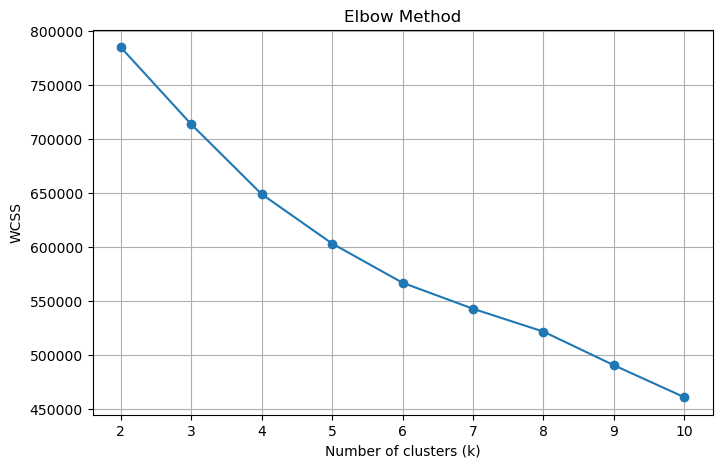

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [8]:
from sklearn.cluster import KMeans
import mlflow
import mlflow.sklearn

# MLflow setup
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("KMeans_model")

k = 5

with mlflow.start_run(run_name="KMeans_Clustering_k5") as run:
    mlflow.log_param("n_clusters", k)

    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    df["cluster"] = labels

    mlflow.sklearn.log_model(kmeans, "kmeans_model_k5")


2026/01/25 12:11:02 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2026/01/25 12:11:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

🏃 View run KMeans_Clustering_k5 at: http://127.0.0.1:5000/#/experiments/3/runs/7e1c2bba2eef48fa9d582b03f11cd15c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3


In [9]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
sil= silhouette_score(X_scaled, labels) #Measures cluster separation and cohesion
ch= calinski_harabasz_score(X_scaled, labels)  # Measures cluster compactness vs. separation
db= davies_bouldin_score(X_scaled, labels) # Measures average similarity between clusters

print(f"Silhouette Score: {sil}")
print(f"Calinski-Harabasz Index: {ch}")
print(f"Davies-Bouldin Index: {db}")

with mlflow.start_run(run_name="Cluster_Evaluation_k5"):
    mlflow.log_metric("silhouette_score", sil)
    mlflow.log_metric("calinski_harabasz", ch)
    mlflow.log_metric("davies_bouldin", db)


Silhouette Score: 0.15382814182651522
Calinski-Harabasz Index: 13204.645103007531
Davies-Bouldin Index: 1.683742020903233
🏃 View run Cluster_Evaluation_k5 at: http://127.0.0.1:5000/#/experiments/3/runs/2e9eaa8dcd7842e28edc9d3985f73941
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3


In [10]:
from sklearn.decomposition import PCA

# Create PCA that keeps 95% of the information
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)

# Print shapes to see how many features were reduced
print("Original shape:", X_scaled.shape)
print("PCA shape:", X_pca.shape)

with mlflow.start_run(run_name="PCA_Dimensionality_Reduction_changed"):
    mlflow.log_param("original_features", X_scaled.shape[1])
    mlflow.log_param("reduced_features", X_pca.shape[1])
    mlflow.log_param("explained_variance_ratio", pca.explained_variance_ratio_.tolist())
    mlflow.log_param("cumulative_explained_variance", pca.explained_variance_ratio_.cumsum().tolist())


Original shape: (101766, 9)
PCA shape: (101766, 2)
🏃 View run PCA_Dimensionality_Reduction_changed at: http://127.0.0.1:5000/#/experiments/3/runs/bdf9a182e49c407aad0c918d46c3892d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3


## 2 PCA components capture only 38% of the dataset’s information,  — PCA is compressing 9 features into 2, so it loses information.

In [11]:
from sklearn.cluster import KMeans

k_pca = 5   # or whatever number you want

kmeans_pca = KMeans(n_clusters=k_pca, init="k-means++", random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)


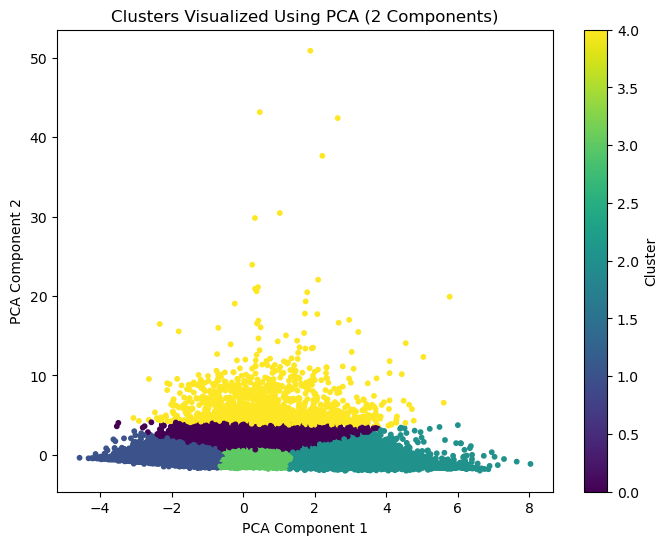

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plot PCA Component 1 vs Component 2
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    c=labels_pca, 
    cmap='viridis', 
    s=10
)

plt.title("Clusters Visualized Using PCA (2 Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


## Lable clusters

In [13]:
df['cluster_pca'] = labels_pca


In [14]:
cluster_summary = df.groupby('cluster_pca').agg({
    'age': 'mean',
    'time_in_hospital': 'mean',
    'num_lab_procedures': 'mean',
    'num_procedures': 'mean',
    'num_medications': 'mean',
    'number_outpatient': 'mean',
    'number_emergency': 'mean',
    'number_inpatient': 'mean',
    'number_diagnoses': 'mean',
    'readmitted': lambda x: x.value_counts().index[0]
})

cluster_summary



,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
cluster_pca,,,,,,,,,,
0,6.105807,4.244404,44.682814,0.706683,16.301925,1.297464,0.694084,2.238692,8.299969,1
1,5.680682,2.400933,31.984823,0.683331,10.235255,0.177601,0.069059,0.270101,6.085848,2
2,6.423397,8.680688,59.912646,3.044080,27.633383,0.266429,0.094477,0.532724,8.524862,2
3,6.387504,4.588652,46.077822,1.500934,16.608811,0.155828,0.042082,0.292444,7.891886,2
4,4.954513,4.488087,44.501083,0.901083,17.645487,3.578339,4.231769,5.526354,8.124188,1


  Cluster 0 — Older, High Inpatient Use, Moderate Complexity
- Older age
- High labs
- High meds
- High inpatient visits (2.23)
- Moderate emergency/outpatient
- Moderate hospital stay
- Readmission = NO

 Profile:
Older patients with frequent inpatient visits but stable readmission patterns. Likely chronic but controlled.

 Cluster 1 — Low-Risk, Minimal Hospital Use
- Middle-aged
- Lowest labs
- Lowest meds
- Very low inpatient/emergency/outpatient
- Shortest hospital stay
- Readmission = >30 days

Profile:
Low‑risk patients with minimal hospital utilization and long readmission intervals.


 Cluster 2 — High-Complexity, High-Intensity Care
- Oldest
- Highest labs
- Highest meds
- Highest procedures
- Longest hospital stay
- Moderate inpatient
- Readmission = >30 days

 Profile:
Very high‑complexity patients requiring intensive diagnostics, medications, and long hospital stays.

Cluster 3 — Older Chronic-Care, Low Hospital Visits
- Older
- High labs
- High meds
- Very low inpatient/emergency/outpatient
- Moderate hospital stay
- Readmission = >30 days

 Profile:
Older chronic‑care patients with high medication/lab needs but low hospital visit frequency.


Cluster 4 — Younger, Extremely High Utilization
- Youngest
- High labs
- High meds
- Extremely high inpatient (5.52)
- Extremely high emergency (4.23)
- Extremely high outpatient (3.57)
- Moderate hospital stay
- Readmission = NO

Profile:
Younger but very high‑utilization patients with heavy use of all hospital services.










## Visualizing lables for better clarity

In [15]:
cluster_labels={
    0: "Older High-Inpatient Low-Readmission",
    1: "Low-Risk Minimal-Use",
    2: "High-Complexity Long-Stay",
    3: "Older Chronic-Care- low visits",
    4: "Younger High-Utilization"


}

In [16]:
df['cluster_label'] = df['cluster_pca'].map(cluster_labels)

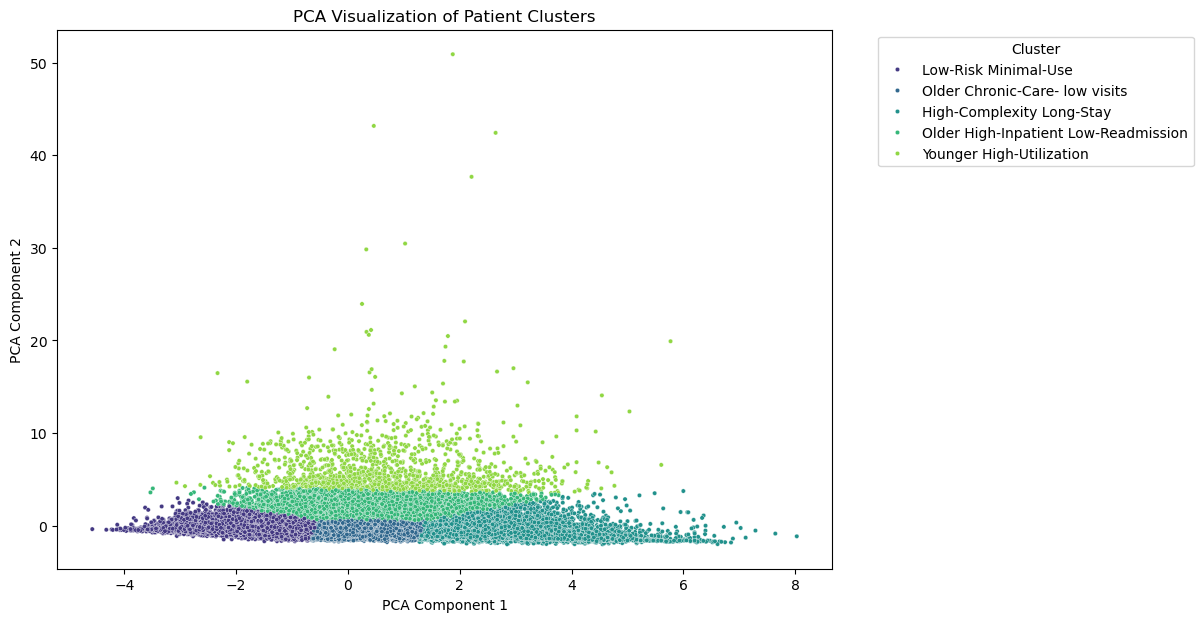

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df['cluster_label'],
    palette='viridis',
    s=10
)

plt.title("PCA Visualization of Patient Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


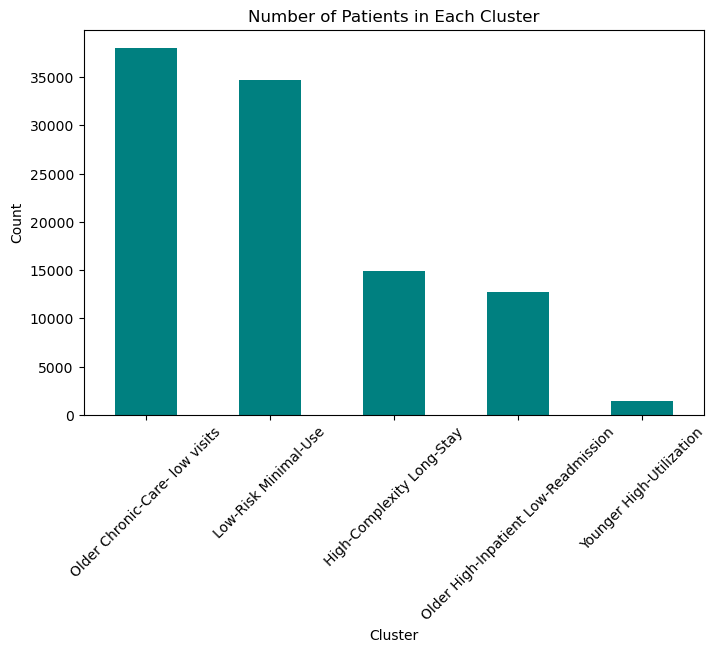

In [18]:
plt.figure(figsize=(8,5))
df['cluster_label'].value_counts().plot(kind='bar', color='teal')

plt.title("Number of Patients in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


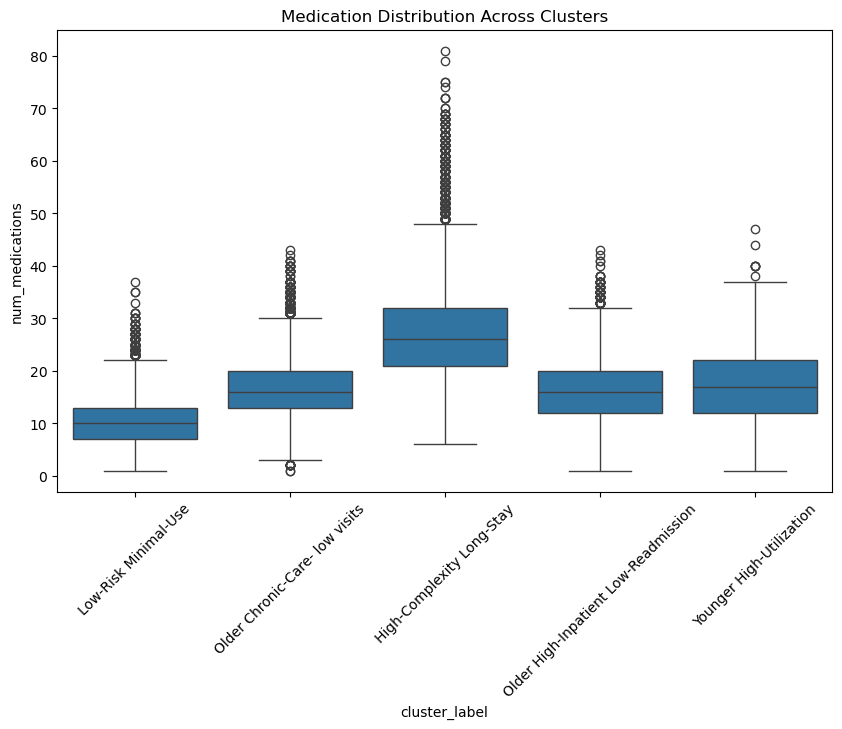

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster_label', y='num_medications', data=df)
plt.xticks(rotation=45)
plt.title("Medication Distribution Across Clusters")
plt.show()


## applied KMeans clustering on nine healthcare utilization features to segment patients into five meaningful groups.
## PCA visualization and feature analysis revealed distinct profiles such as low‑risk minimal users, older chronic‑care patients, high‑complexity long‑stay patients, older high‑inpatient users, and younger high‑utilization patients.
## These clusters provide actionable insights for targeted care management and resource allocation


**Distinct profiles**

## 1. Low‑Risk Minimal‑Use
Key characteristics:
- Lowest lab procedures, medications, and diagnoses
- Very low inpatient, emergency, and outpatient visits
- Shortest hospital stays
- Readmission mostly >30 days

Interpretation:
These patients are generally stable, low‑risk individuals with minimal interaction with the healthcare system. They represent the “healthy majority” and require routine monitoring rather than intensive care.




## 2. Older Chronic‑Care, Low Visits
Key characteristics:
- Older age group
- Moderate labs and medications
- Very low hospital visits (inpatient, emergency, outpatient)
- Moderate diagnoses
- Readmission mostly >30 days

Interpretation:
These are older patients with chronic conditions that require regular medication and lab monitoring but not frequent hospital visits. They are stable chronic‑care patients who benefit from consistent outpatient management


## 3. High‑Complexity, Long‑Stay
Key characteristics:
- Highest lab procedures, medications, procedures, and diagnoses
- Longest hospital stays
- Moderate inpatient visits
- Readmission mostly >30 days

Interpretation:
This is the highest‑complexity group. They require intensive diagnostics, multiple medications, and prolonged hospital stays. They represent a clinically heavy segment needing coordinated, multidisciplinary care.


## 4. Older High‑Inpatient, Low‑Readmission
Key characteristics:
- Older age
- High inpatient visits
- Moderate labs and medications
- Low emergency/outpatient visits
- Readmission mostly NO

Interpretation:
These patients frequently require inpatient care but are not repeatedly readmitted, suggesting that their inpatient episodes are effective. They may represent acute‑on‑chronic cases where hospital stays stabilize their condition.


## 5. Younger High‑Utilization
Key characteristics:
- Youngest group
- Extremely high inpatient, emergency, and outpatient visits
- Moderate medications and labs
- Moderate diagnoses
- Readmission mostly NO

Interpretation:
This is a small but important segment: younger patients with very high healthcare utilization across all visit types. Their defining feature is not medication load but frequent hospital contact, possibly due to acute or unstable conditions requiring rapid interventions.


Saving clustering artifacts 

In [21]:
import joblib

# Save all three components of the pipeline
joblib.dump(scaler, "cluster_scaler.pkl")
joblib.dump(pca, "cluster_pca.pkl")
joblib.dump(kmeans_pca, "cluster_model.pkl")
joblib.dump(list(X.columns), "cluster_features.pkl")

print("Saved: cluster_scaler.pkl, cluster_pca.pkl, cluster_model.pkl, cluster_features.pkl")

Saved: cluster_scaler.pkl, cluster_pca.pkl, cluster_model.pkl, cluster_features.pkl
